# Gradient Descent

This notebook is aimed at manipulating the gradient descent algorithm in simple cases to figure out part of it's use cases.

## Linear Regression

Let's start first by generating a dummy dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size = 1000
X = 10*np.random.rand(size , 1)
y = 5 + 4*X + 3*np.random.randn(size, 1) + (X-4)**2*np.cos(3*X)

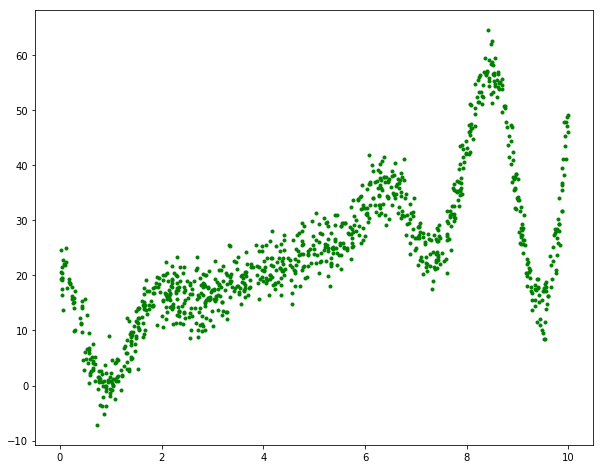

In [3]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')

In [4]:
import sklearn as sk

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.base import BaseEstimator

In [444]:
class myLinearRegression(BaseEstimator):
    """Linear Regression Model using gradient descent for training."""
    def __init__(self, alpha=None):
        """alpha is initial parameter value."""
        self.alpha = alpha
    def fit(self, X, y, C=0, tol=0.01, rate=0.01, max_iter=1000, intercept=True):
        """Training method. Gradient descent training using l2 penality."""
        n, m = X.shape[0], X.shape[1]
        X_ones = X
        if intercept:
            X_ones = np.vstack([np.ones((1, m)), X.reshape(n, -1)])
            print(X_ones[:10, :10])
            print(y.shape)
        if not np.all(self.alpha):
            self.alpha = np.random.rand(n + intercept, 1)
        cpt = 0
        gradient = tol + 1
        iterates = [self.alpha]
        while cpt < max_iter and  np.linalg.norm(gradient) > tol:
            # Update formula
            print(self.alpha.shape)
            print(X_ones.shape)
            print((self.alpha.T.dot(X_ones)).shape)
            gradient = (1/m)*(self.alpha.T.dot(X_ones) - y.T).dot(X_ones.T) + C*np.sum(self.alpha)
            self.alpha = (self.alpha.T - (rate) * gradient).T
            iterates.append(self.alpha)
            cpt += 1
        return iterates
    def predict(self, X):
        """Prediction method. It takes multi-instances one per row."""
        m, n = X.shape[0], X.shape[1]
        X_ones = np.r_[np.ones((1, m)), X.reshape(n, -1)]
        return self.alpha.T.dot(X_ones).T

In [445]:
my_lin_reg = myLinearRegression()

In [446]:
iterates = my_lin_reg.fit(X_train, y_train)

[[1.        ]
 [9.90219583]
 [0.48952568]
 [8.49143582]
 [0.03113014]
 [1.75936267]
 [8.93444462]
 [9.55766962]
 [0.85724447]
 [7.98841648]]
(800, 1)
(801, 1)
(801, 1)
(1, 1)


ValueError: shapes (1,800) and (1,801) not aligned: 800 (dim 1) != 1 (dim 0)

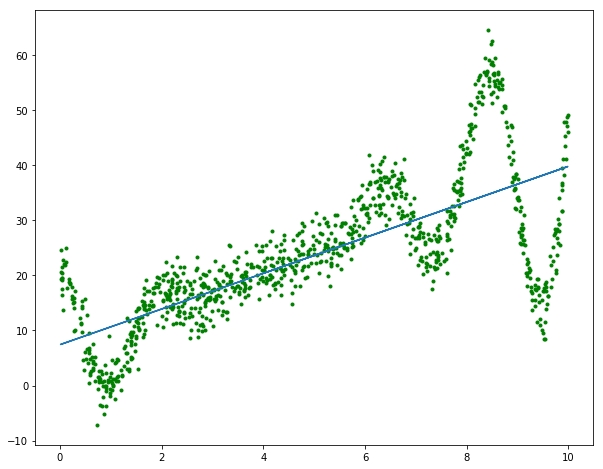

In [382]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')
for gamma in iterates[-1:]:
    ax.plot(X, gamma[1]*X + gamma[0])

In [383]:
from sklearn.preprocessing import PolynomialFeatures

In [384]:
d = 2
poly_d = PolynomialFeatures(d)

In [385]:
poly_d.fit(X_train)
X_d_train = poly_d.transform(X_train).T
X_d_test = poly_d.transform(X_test).T
X_d = poly_d.transform(X)

In [386]:
X_d_train[:10, :]

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 9.90219583,  0.48952568,  8.49143582, ...,  3.07957268,
         8.05211679,  8.10571128],
       [98.05348224,  0.2396354 , 72.1044823 , ...,  9.48376787,
        64.83658486, 65.70255531]])

In [387]:
my_pol_reg = myLinearRegression(alpha=None)

In [388]:
iterates = my_pol_reg.fit(X_d_train, y_train, intercept=False)

(3, 800)
(800, 1)
(3, 800)
(1, 800)


ValueError: shapes (1,800) and (3,800) not aligned: 800 (dim 1) != 3 (dim 0)

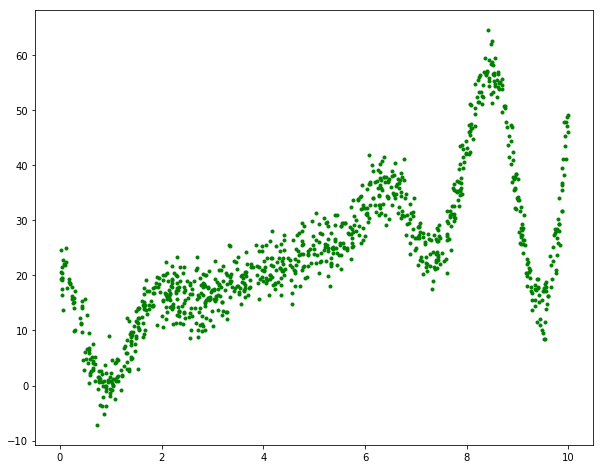

In [246]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')
ax.plot(X_test, my_pol_reg.predict(X_d_test), 'ro')


In [101]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
LogisticRegression??